In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
df=pd.read_csv("insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
num_col=df.select_dtypes(include=["int","float"])
num_col.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

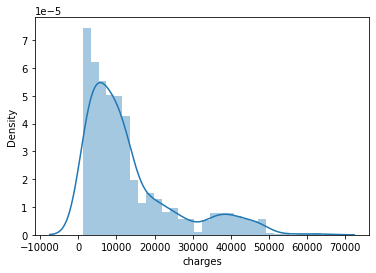

In [8]:
sns.distplot(df["charges"])
plt.show()

# Removing skewnees

In [9]:
#df["charges"]=np.log(1+df["charges"])

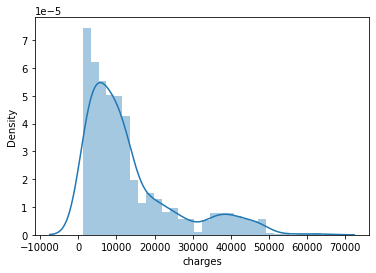

In [10]:
sns.distplot(df["charges"])
plt.show()

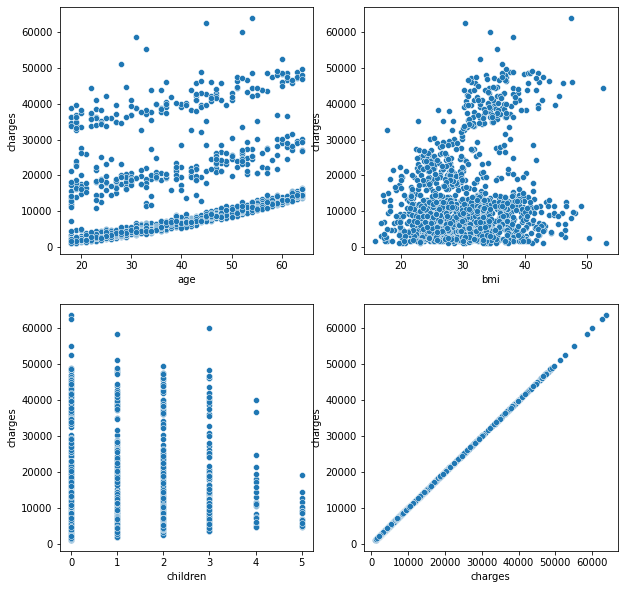

In [11]:
plt.figure(figsize=(10,10))
count=1
for i in num_col:
    plt.subplot(2,2,count)
    sns.scatterplot(x=df[i],y=df["charges"])
    count+=1
    

In [12]:
cat_col=df.select_dtypes(include="O")
cat_col.columns

Index(['sex', 'smoker', 'region'], dtype='object')

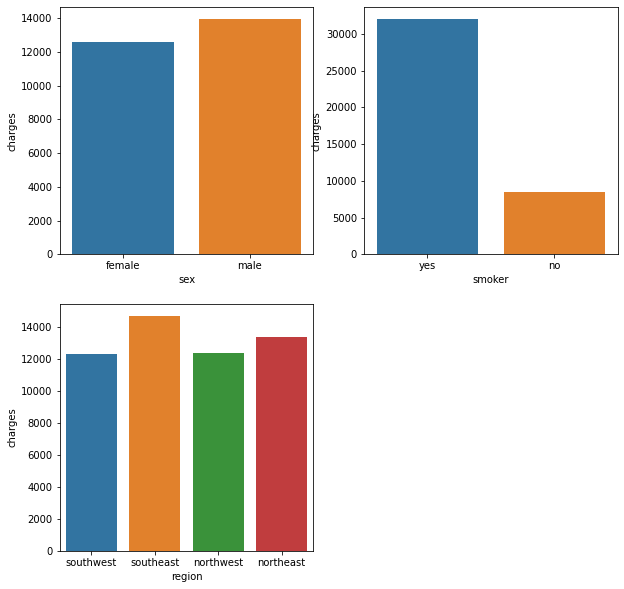

In [13]:
plt.figure(figsize=(10,10))
count=1
for i in cat_col:
    plt.subplot(2,2,count)
    sns.barplot(x=df[i],y=df["charges"],ci=False)
    count+=1

In [14]:
df.groupby("sex").mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [15]:
df.groupby("region").mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [16]:
df.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


# ENCODING

In [17]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# Train test split

In [18]:
X=df.drop("charges",axis=1)
y=df["charges"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=67)

# Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc=StandardScaler()

In [23]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [25]:
lr=LinearRegression()
dt=DecisionTreeRegressor()

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print("Train Data")
    print(round(r2_score(y_train,y_pred_train),2))
    print(round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
    
    print("Test Data")
    print(round(r2_score(y_test,y_pred_test),2))
    print(round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2))
    return model

In [27]:
my_model(lr)

Train Data
0.75
5988.45
Test Data
0.74
6256.51


LinearRegression()

In [28]:
my_model(dt)

Train Data
1.0
413.78
Test Data
0.74
6298.73


DecisionTreeRegressor()

In [29]:
clf=DecisionTreeRegressor(max_depth=5, min_samples_leaf=3,min_samples_split=4)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
print("Train Data")
print(r2_score(y_train,y_pred_train))
print("Test Data")

print(r2_score(y_test,y_pred_test))

Train Data
0.8773727357873371
Test Data
0.8537626580981904
